**Fremont bridge bike counter**
Video: Reproducible Data Analysis in Jupyter(1/10) https://www.youtube.com/watch?v=_ZEWDGpM-vM&index=1&list=PLYCpMb24GpOC704uO9svUrihl-HY1tTJJ<br>
Data: https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k<br>
Click 'Export'=> at 'CSV', right click => copy link address  (=URL)

In [11]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [12]:
from urllib.request import urlretrievefremont bridge bike counter 
urlretrieve(URL, 'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x25764956588>)

In [13]:
!head Fremont.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
import pandas as pd
data = pd.read_csv('Fremont.csv')
data.head()

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,12/31/2018 11:00:00 PM,7.0,6.0
1,12/31/2018 10:00:00 PM,3.0,4.0
2,12/31/2018 09:00:00 PM,7.0,7.0
3,12/31/2018 08:00:00 PM,12.0,14.0
4,12/31/2018 07:00:00 PM,9.0,5.0


In [21]:
# to set the 'Date' as the index instead of using 0, 1, 2,...
# Parse the 'Date' automatically (else it is read as string) to turn into dates & can manipulate/use
data = pd.read_csv('Fremont.csv', index_col = 'Date', parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2018-12-31 23:00:00,7.0,6.0
2018-12-31 22:00:00,3.0,4.0
2018-12-31 21:00:00,7.0,7.0
2018-12-31 20:00:00,12.0,14.0
2018-12-31 19:00:00,9.0,5.0


In [24]:
data = data.sort_index()
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


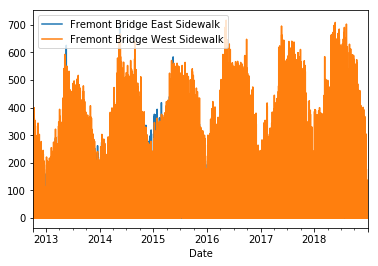

In [25]:
%matplotlib inline
data.plot()

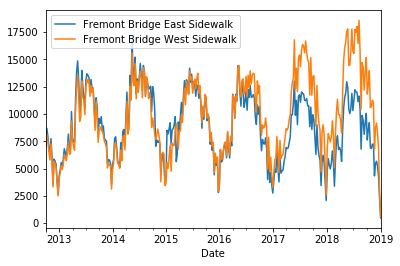

In [26]:
# Plot weekly sum of the bike ride
data.resample('W').sum().plot()
# about 4k trips/week during winter & 13k trips/week during summer

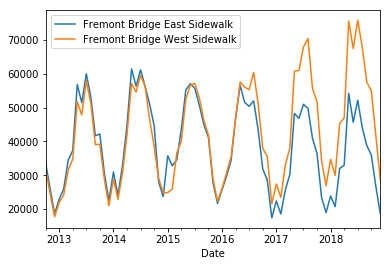

In [27]:
# Monthly sum
data.resample('M').sum().plot()

Video 2

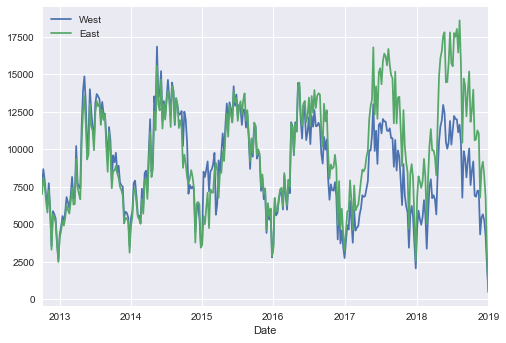

In [28]:
# Nicer plot with seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn')

data.columns = ['West', 'East']
data.resample('W').sum().plot()

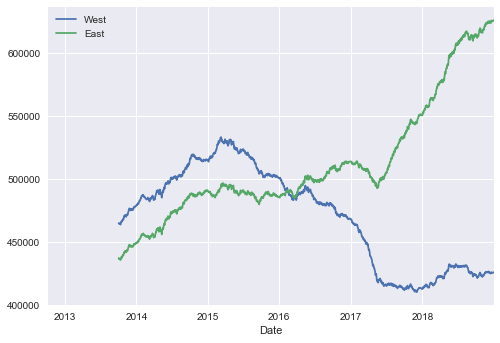

In [30]:
# Rolling sum of over 365 days of all the data
data.resample('D').sum().rolling(365).sum().plot()

(0, 637039.6)

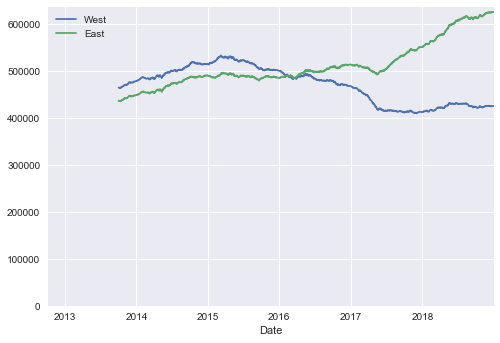

In [31]:
# with axes, to capture y start from 0 value. y: number of bike rides
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)  # None: use the current maximum

(0, 1084071.85)

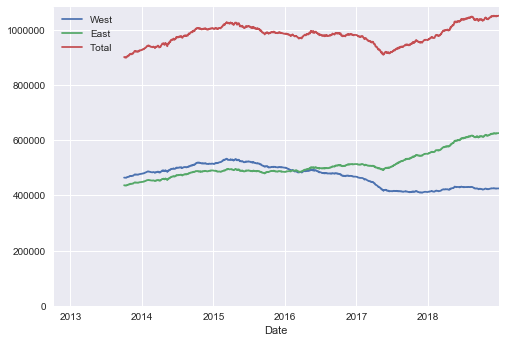

In [32]:
# add Total ride column
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)  # None: use the current maximum

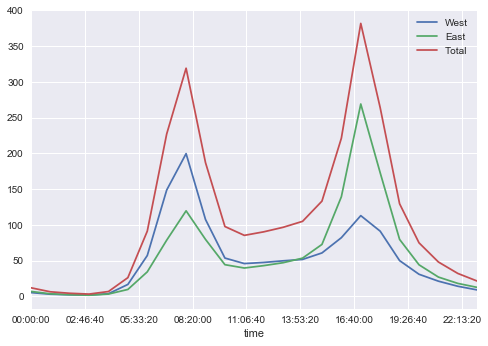

In [33]:
# Trend within individual day, i.e. groupby the time of day & take the mean
data.groupby(data.index.time).mean().plot()
#'East': peak in the afternoon, whereas 'West': peak in the morning
# People going into the city on the West Side Walk in the morning & out of the city on the East side block in the afternoon

In [55]:
print(data.head(3), '\n')
# data['Date'] # error, because 'Date' is an index now
print(data.index.date, '\n')
print(data.index.time)

                     West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0 

[datetime.date(2012, 10, 3) datetime.date(2012, 10, 3)
 datetime.date(2012, 10, 3) ... datetime.date(2018, 12, 31)
 datetime.date(2018, 12, 31) datetime.date(2018, 12, 31)] 

[datetime.time(0, 0) datetime.time(1, 0) datetime.time(2, 0) ...
 datetime.time(21, 0) datetime.time(22, 0) datetime.time(23, 0)]


In [36]:
# pivot table based on time
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


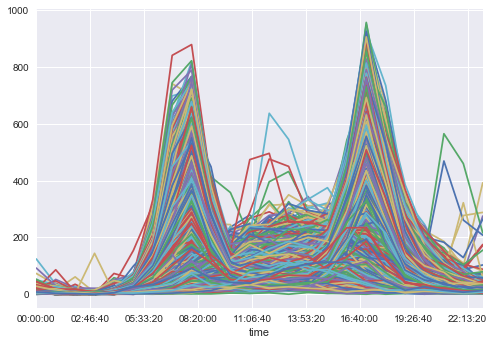

In [56]:
# Don't want legend
pivoted.plot(legend=False)

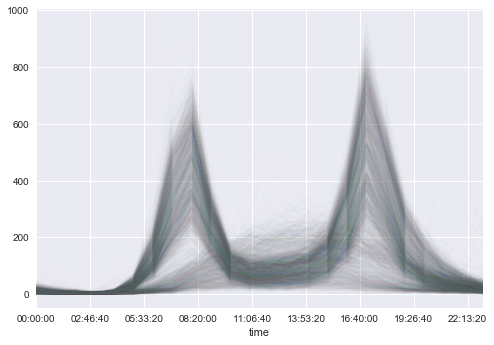

In [57]:
# Trasparent line (alpha)
pivoted.plot(legend=False, alpha=0.01)

**Video 3: Version Control with Git & GitHub**

Sign in Github => Create new repository => assign repository name, description, tick Public, tick 'Initialize with a README', add 'gitignore: Puthon, add license if any => Create repository<br>
This will create a cloud base back up.